Submit links to a Github repository containing a Jupyter notebook. The notebook should contain:

- The questions you asked
- The trends you investigated
- The resulting visualizations and conclusions.

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
con = sqlite3.connect("data/citibike_database.db3")

## Questions:
- Who is riding?
- How many people are riding?
- When do people ride?
- Where do they ride?
- Are these trends changing over time?


### Who is riding?
- The majority of rides are taken by subscribers
- The majority of rides are taken by males
- The median age of riders is 38 (note not of unqiue subscribers, rather this is weighted by # rides)

In [18]:
# usertype
df = pd.read_sql_query('SELECT usertype,count(*) as N FROM rides WHERE usertype != "None" GROUP BY usertype',con)
df.head()

,usertype,N
0,Customer,4372550
1,Subscriber,34723683


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
usertype    2 non-null object
N           2 non-null int64
dtypes: int64(1), object(1)
memory usage: 112.0+ bytes


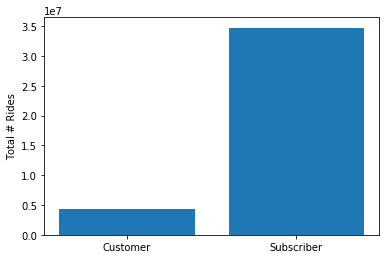

In [27]:
plt.bar([1,2],df.N)
plt.xticks([1,2],['Customer','Subscriber']);
plt.ylabel('Total # Rides');

In [28]:
# gender
df=pd.read_sql_query('SELECT gender,count(*) as N FROM rides GROUP BY gender',con)
df

,gender,N
0,0,4524854
1,1,26467273
2,2,8155886


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
gender    3 non-null int64
N         3 non-null int64
dtypes: int64(2)
memory usage: 128.0 bytes


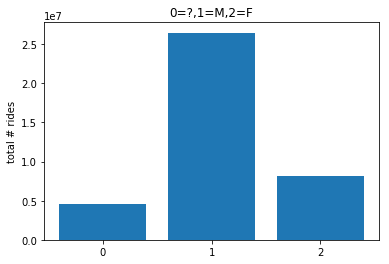

In [29]:
df.gender=df.gender.astype('int64')
df.info()
plt.bar(df.gender,df.N)
plt.xticks([0,1,2])
plt.title('0=?,1=M,2=F')
plt.ylabel('total # rides')

In [44]:
# age
query = 'SELECT birth_year FROM rides WHERE birth_year != "None" AND birth_year != "\\N"  AND birth_year>1917 '
df = pd.read_sql_query(query,con)
df.head()

,birth_year
0,1980
1,1986
2,1988
3,1985
4,1980


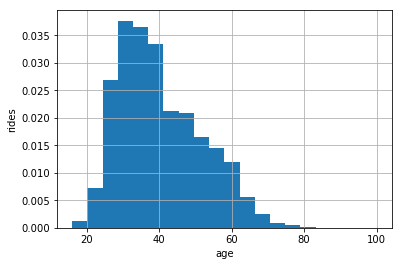

In [50]:
df.birth_year=df.birth_year.astype('float64')
df['age']=2017-df.birth_year
plt.hist(df.age,20,normed=True);
plt.xlabel('age')
plt.grid();

In [51]:
df.describe()

,birth_year,age
count,3.466429e+07,3.466429e+07
mean,1.976821e+03,4.017932e+01
std,1.144880e+01,1.144880e+01
min,1.917000e+03,1.600000e+01
25%,1.969000e+03,3.100000e+01
50%,1.979000e+03,3.800000e+01
75%,1.986000e+03,4.800000e+01
max,2.001000e+03,1.000000e+02


### How many rides do they take?
- The number of rides has increased each year
- number stations?
- number bikes?
- could be more users, but there isn't a way to identify unique users in the data

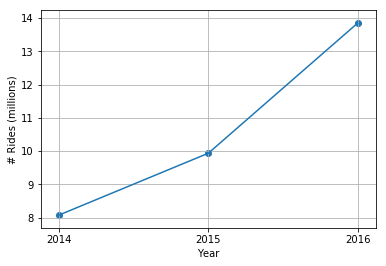

In [56]:
df = pd.read_sql_query("SELECT year,count(*) as num_rides FROM rides WHERE year IN (2014,2015,2016) GROUP BY year",con)
#df
df.year = df.year.astype('int')
plt.plot(df.year,df.num_rides/1e6)
plt.scatter(df.year,df.num_rides/1e6)
plt.grid();
plt.gca().set_xticks([2014,2015,2016]);
plt.xlabel('Year')
plt.ylabel('# Rides (millions)');

In [43]:
# for each month
query = "SELECT year,month,count(*) as N FROM rides WHERE year IN (2014,2015,2016) GROUP BY year,month "

df_rides = pd.read_sql_query(query,con)
df_rides.head()

,year,month,N
0,2014,1,300400
1,2014,2,224736
2,2014,3,439117
3,2014,4,670780
4,2014,5,866117


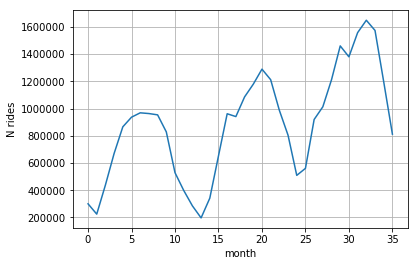

In [11]:
plt.plot(df.N)
plt.grid();
plt.xlabel('month');
plt.ylabel('N rides')

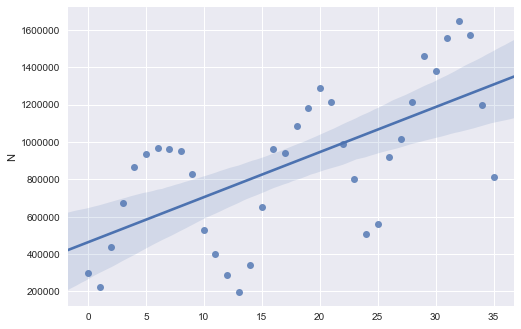

In [36]:
import seaborn as sns
import numpy as np
x=np.array(range(0,len(df.N)))
#range(0,len(df.N)-1)

Is this because more stations or bikes were added?

In [41]:
# get number of unique stations for same months and scatter plot vs # rides
query = "SELECT year,month,count(distinct start_station_id) as N FROM rides WHERE year IN (2014,2015,2016) GROUP BY year,month"
df_sta = pd.read_sql_query(query,con)
df_sta.head()

,year,month,N
0,2014,1,329
1,2014,2,329
2,2014,3,331
3,2014,4,329
4,2014,5,328
5,2014,6,328
6,2014,7,328
7,2014,8,326
8,2014,9,328
9,2014,10,329


In [49]:
# calculate # of unique bikes each month
query = 'SELECT year,month,COUNT(DISTINCT bikeid) as N FROM rides WHERE year IN (2014,2015,2016) GROUP BY year,month'
df_bikes = pd.read_sql_query(query,con)
df_bikes.head()

,year,month,N
0,2014,1,6354
1,2014,2,5699
2,2014,3,6298
3,2014,4,6532
4,2014,5,6186


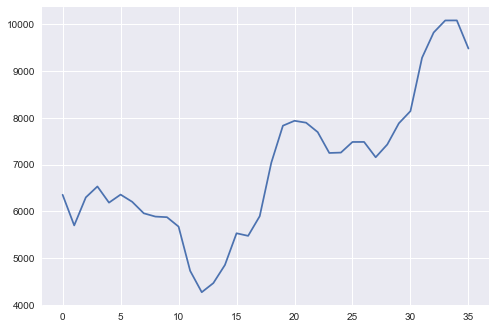

In [50]:
plt.plot(df_bikes.N)

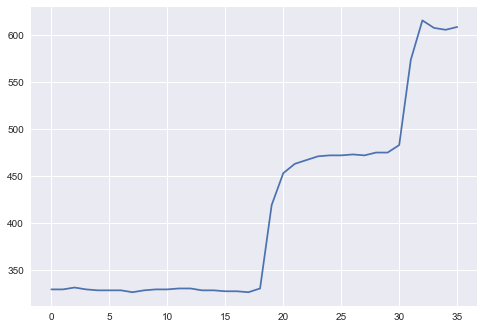

In [42]:
plt.plot(df_sta.N)

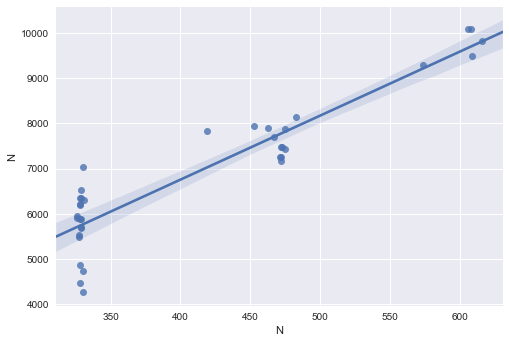

In [51]:
sns.regplot(df_sta.N,df_bikes.N)

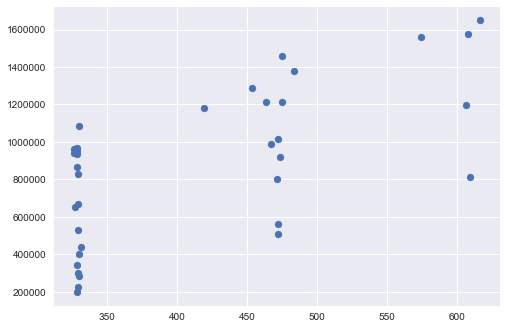

In [44]:
plt.scatter(df_sta.N, df_rides.N)

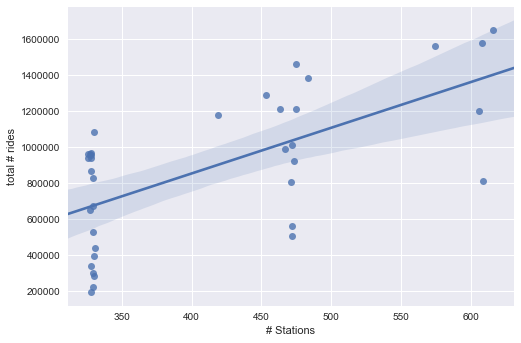

In [48]:
sns.regplot(df_sta.N,df_rides.N)
plt.xlabel('# Stations')
plt.ylabel('total # rides');

### When do people ride?
- They ride more in the summer/early fall
- They ride more during the week than on weekends
- During the week, they rides during rush hour.
- On weekends, they sleep in and ride throughout the day

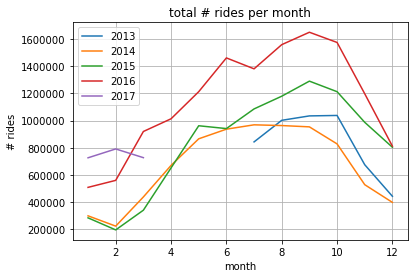

In [52]:
# total rides per month, each year
# count rides per month for one year
years = [2013,2014,2015,2016,2017]
for year in years:
    df = pd.read_sql_query("SELECT year,month,count(*) as num_rides FROM rides WHERE year=? GROUP BY month", con,params=[year])
    plt.plot(df.month, df.num_rides, label=str(year))
    #plt.scatter(df.month, df.num_rides)

plt.grid()
plt.xlabel('month')
plt.ylabel('# rides')
plt.legend();
plt.title('total # rides per month')

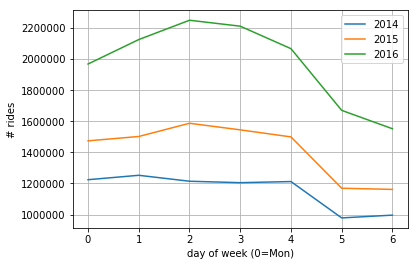

In [53]:
# For all comnplete years
# difference in magnitudes; maybe plot pdf instead?
years = [2014, 2015, 2016]
query = "SELECT year,wkday,count(*) as num_rides FROM rides WHERE year=? GROUP BY wkday"

for year in years:
    df_wkday = pd.read_sql_query(query, con, params=[year] )
    plt.plot(df_wkday.wkday,df_wkday.num_rides, label=str(year) )

plt.grid()
plt.xlabel('day of week (0=Mon)')
plt.ylabel('# rides')
#plt.title(
plt.legend();

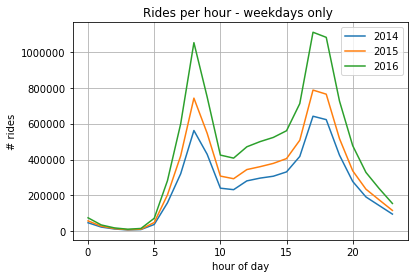

In [57]:
# hour of day - weekdays
years = [2014, 2015, 2016]
query = ('SELECT hour,count(*) as num_rides FROM rides WHERE year=? AND wkday<5 GROUP BY hour')

for year in years:
    df_hr = pd.read_sql_query(query, con, params=[year])
    plt.plot(df_hr.hour, df_hr.num_rides, label=str(year))

plt.grid()
plt.xlabel('hour of day')
plt.ylabel('# rides')
plt.title('Rides per hour - weekdays only ')
plt.legend();

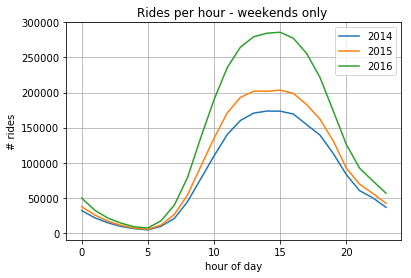

In [58]:
# hour of day - weekends

years = [2014, 2015, 2016]
query = ('SELECT hour,count(*) as num_rides FROM rides WHERE year=? AND wkday>4 GROUP BY hour')

for year in years:
    df_hr = pd.read_sql_query(query, con, params=[year])
    plt.plot(df_hr.hour, df_hr.num_rides, label=str(year))

plt.grid()
plt.xlabel('hour of day')
plt.ylabel('# rides')
plt.title('Rides per hour - weekends only ')
plt.legend();

### Where do they ride?
- On weekdays, some of most popular stations are near transit hubs like Penn St, Grand Central, LIRA
- On weekends, some of the most popular stations are near Central Park.